In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 1.0
alfa = 30

In [6]:
def u_exacta(x, y, z):
    return np.exp(-alfa * ((x - 0.5)**2 + (y - 0.5)**2 + (z - 0.5)**2))

In [9]:
def f_sursa(x, y, z):
    u = u_exacta(x, y, z)
    dx = x - 0.5
    dy = y - 0.5
    dz = z - 0.5

    du_dx = -2 * alfa * dx * u
    du_dy = -2 * alfa * dy * u
    du_dz = -2 * alfa * dz * u

    d2u_dx2 = (4 * alfa**2 * dx**2 - 2 * alfa) * u
    d2u_dy2 = (4 * alfa**2 * dy**2 - 2 * alfa) * u
    d2u_dz2 = (4 * alfa**2 * dz**2 - 2 * alfa) * u

    kx = 5*(1 + x**2)
    ky = 5*(1 + y**2)
    kz = 5*(1 + z**2)

    dkx_dx = 10 * x
    dky_dy = 10 * y
    dkz_dz = 10 * z

    termen_x = dkx_dx * du_dx + kx * d2u_dx2
    termen_y = dky_dy * du_dy + ky * d2u_dy2
    termen_z = dkz_dz * du_dz + kz * d2u_dz2

    return -(termen_x + termen_y + termen_z)

In [10]:
def rulare_3D(n):
    x = np.linspace(0, L, n)
    y = np.linspace(0, L, n)
    z = np.linspace(0, L, n)
    h = x[1] - x[0]

    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    u_ex = u_exacta(X, Y, Z)
    f = f_sursa(X, Y, Z)

    kx = 5 * (1 + X**2)
    ky = 5 * (1 + Y**2)
    kz = 5 * (1 + Z**2)

    u = np.zeros_like(X)

    for _ in range(200):
        u_vechi = u.copy()
        for i in range(1, n-1):
            for j in range(1, n-1):
                for k in range(1, n-1):
                    kxp = 0.5 * (kx[i, j, k] + kx[i+1, j, k])
                    kxm = 0.5 * (kx[i, j, k] + kx[i-1, j, k])
                    kyp = 0.5 * (ky[i, j, k] + ky[i, j+1, k])
                    kym = 0.5 * (ky[i, j, k] + ky[i, j-1, k])
                    kzp = 0.5 * (kz[i, j, k] + kz[i, j, k+1])
                    kzm = 0.5 * (kz[i, j, k] + kz[i, j, k-1])

                    u[i, j, k] = (
                        kxp * u_vechi[i+1, j, k] + kxm * u_vechi[i-1, j, k] +
                        kyp * u_vechi[i, j+1, k] + kym * u_vechi[i, j-1, k] +
                        kzp * u_vechi[i, j, k+1] + kzm * u_vechi[i, j, k-1] +
                        h**2 * f[i, j, k]
                    ) / (kxp + kxm + kyp + kym + kzp + kzm)

        u[0, 1:-1, 1:-1] = u_ex[1, 1:-1, 1:-1]
        u[-1, 1:-1, 1:-1] = u_ex[-2, 1:-1, 1:-1]
        u[1:-1, 0, 1:-1] = u_ex[1:-1, 1, 1:-1]

        u[:, -1, :] = u_ex[:, -1, :]
        u[:, :, 0] = u_ex[:, :, 0]
        u[:, :, -1] = u_ex[:, :, -1]

    eroare = np.linalg.norm(u - u_ex) * h**3
    return u, u_ex, np.abs(u - u_ex), eroare, h, X, Y, Z



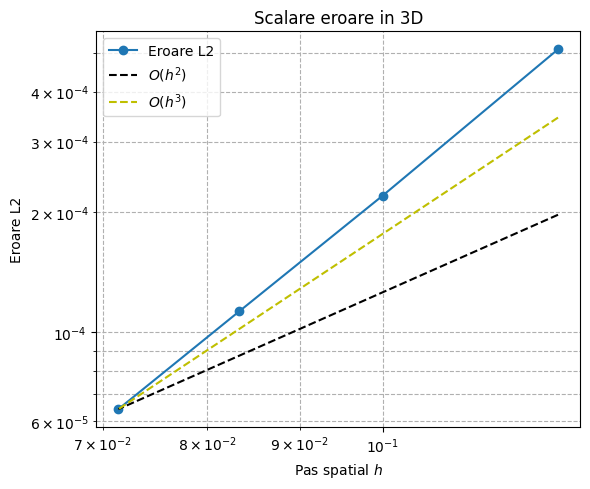

In [ ]:
rezolutii = [9, 11, 13, 15]
erori = []
hs = []

for n in rezolutii:
    _, _, _, err, h, _, _, _ = rulare_3D(n)
    erori.append(err)
    hs.append(h)

plt.figure(figsize=(6, 5))
plt.loglog(hs, erori, 'o-', label='Eroare L2')
plt.loglog(hs, [erori[-1]*(h/hs[-1])**2 for h in hs], 'k--', label='$O(h^2)$')
plt.loglog(hs, [erori[-1]*(h/hs[-1])**3 for h in hs], 'y--', label='$O(h^3)$')
plt.xlabel('Pas spatial $h$')
plt.ylabel('Eroare L2')
plt.title('Scalare eroare in 3D')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()

n = 100
u_num, u_ex, err, _, h, X, Y, Z = rulare_3D(n)

mijloc = n // 2
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(X[:, :, mijloc], Y[:, :, mijloc], u_num[:, :, mijloc], 20, cmap='viridis')
plt.title('Solutie numerica (z=0.5)')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.contourf(X[:, :, mijloc], Y[:, :, mijloc], u_ex[:, :, mijloc], 20, cmap='viridis')
plt.title('Solutie exacta (z=0.5)')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.contourf(X[:, :, mijloc], Y[:, :, mijloc], err[:, :, mijloc], 20, cmap='inferno')
plt.title('Eroare absoluta (z=0.5)')
plt.colorbar()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 8))
axa = fig.add_subplot(111, projection='3d')
esantion = slice(0, n, 100)
sc = axa.scatter(X[esantion, esantion, esantion], Y[esantion, esantion, esantion], Z[esantion, esantion, esantion],
                c=u_num[esantion, esantion, esantion], cmap='viridis', marker='o')
axa.set_title('Solutie numerica 3D')
fig.colorbar(sc, shrink=0.5)
plt.show()

fig = plt.figure(figsize=(10, 8))
axa = fig.add_subplot(111, projection='3d')
sc = axa.scatter(X[esantion, esantion, esantion], Y[esantion, esantion, esantion], Z[esantion, esantion, esantion],
                c=u_ex[esantion, esantion, esantion], cmap='viridis', marker='o')
axa.set_title('Solutie exacta 3D')
fig.colorbar(sc, shrink=0.5)
plt.show()

fig = plt.figure(figsize=(10, 8))
axa = fig.add_subplot(111, projection='3d')
sc = axa.scatter(X[esantion, esantion, esantion], Y[esantion, esantion, esantion], Z[esantion, esantion, esantion],
                c=err[esantion, esantion, esantion], cmap='inferno', marker='o')
axa.set_title('Eroare absoluta 3D')
fig.colorbar(sc, shrink=0.5)
plt.show()
